<a href="https://colab.research.google.com/github/farjusangu/Delivering-personalized-movie-recommendations-with-an-Al-driven-matchmaking-system/blob/main/movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

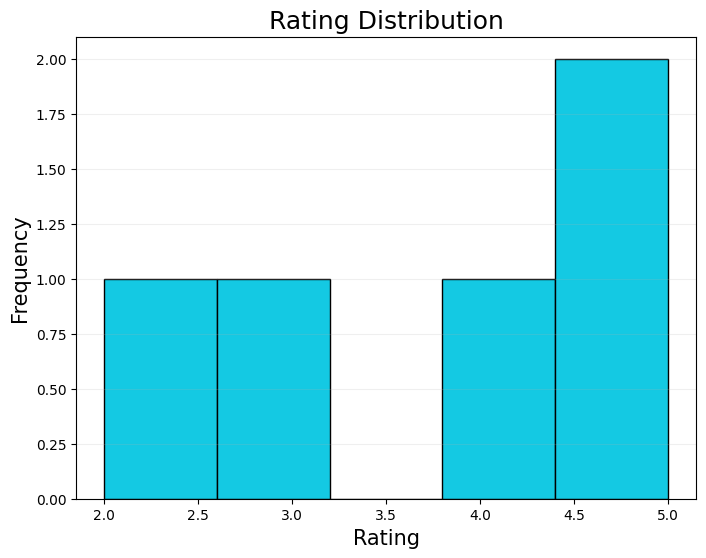

   userId  movieId  rating  timestamp  rating_norm  Action  Comedy  Drama  \
0       1       10     4.0  964982703     0.666667       0       0      1   
1       1       20     5.0  964981247     1.000000       0       1      0   
2       2       10     3.0  964982224     0.333333       0       0      1   
3       2       30     2.0  964983815     0.000000       1       0      0   
4       3       20     4.5  964984100     0.833333       0       1      0   

   Romance  Thriller  
0        1         0  
1        0         0  
2        1         0  
3        0         1  
4        0         0  


In [ ]:
#Install required packages (if not already installed in Colab)
!pip install matplotlib pandas scikit-learn

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Sample MovieLens-style ratings data
data = {
    'userId': [1, 1, 2, 2, 3],
    'movieId': [10, 20, 10, 30, 20],
    'rating': [4.0, 5.0, 3.0, 2.0, 4.5],
    'timestamp': [964982703, 964981247, 964982224, 964983815, 964984100]
}
ratings = pd.DataFrame(data)

# Data Preprocessing
ratings.dropna(inplace=True)

# Example genre data for movies
movie_genres = {
    10: ['Drama', 'Romance'],
    20: ['Comedy'],
    30: ['Action', 'Thriller']
}

# One-hot encode genres
all_genres = sorted(set(g for genres in movie_genres.values() for g in genres))
genre_df = pd.DataFrame(0, index=ratings.index, columns=all_genres)
for idx, movie_id in enumerate(ratings['movieId']):
    for genre in movie_genres[movie_id]:
        genre_df.at[idx, genre] = 1

# Normalize ratings
scaler = MinMaxScaler()
ratings['rating_norm'] = scaler.fit_transform(ratings[['rating']])

# Combine ratings and genres
processed_data = pd.concat([ratings, genre_df], axis=1)

# Exploratory Data Analysis: Plot distribution of ratings
plt.figure(figsize=(8,6))
plt.hist(ratings['rating'], bins=5, edgecolor='black', color='#14c9e3')
plt.title('Rating Distribution', fontsize=18)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(axis='y', alpha=0.2)
plt.show()

# Display processed data
print(processed_data.head())


--2025-05-13 05:59:32--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  2.43MB/s    in 0.4s    

2025-05-13 05:59:33 (2.43 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  
=== Dataset Overview ===
Number of users: 610
Number of movies: 9742
Number of ratings: 100836
Number of tags: 3683
Rating range: 0.5 to 5.0

=== Sample Movies ===
   movieId                         

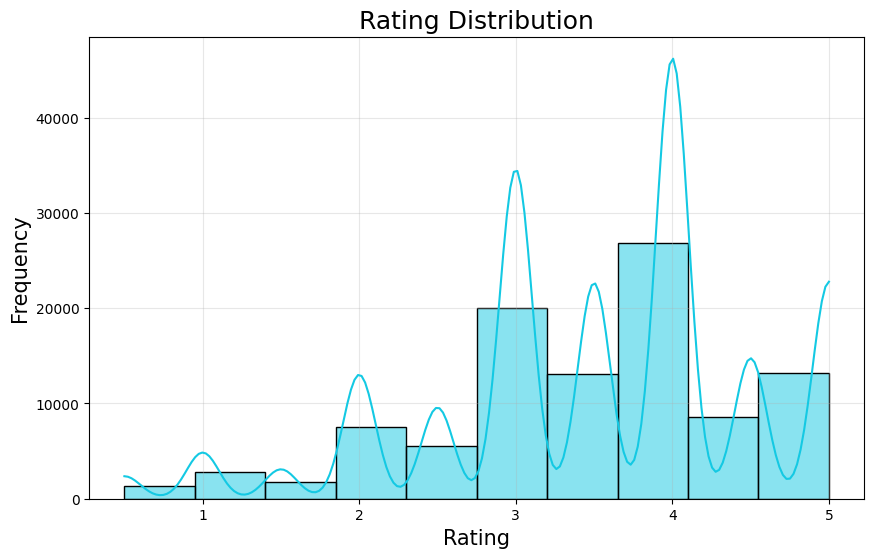

<ipython-input-2-d96c1fa0588c>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.index, y=genres.values, palette='viridis')


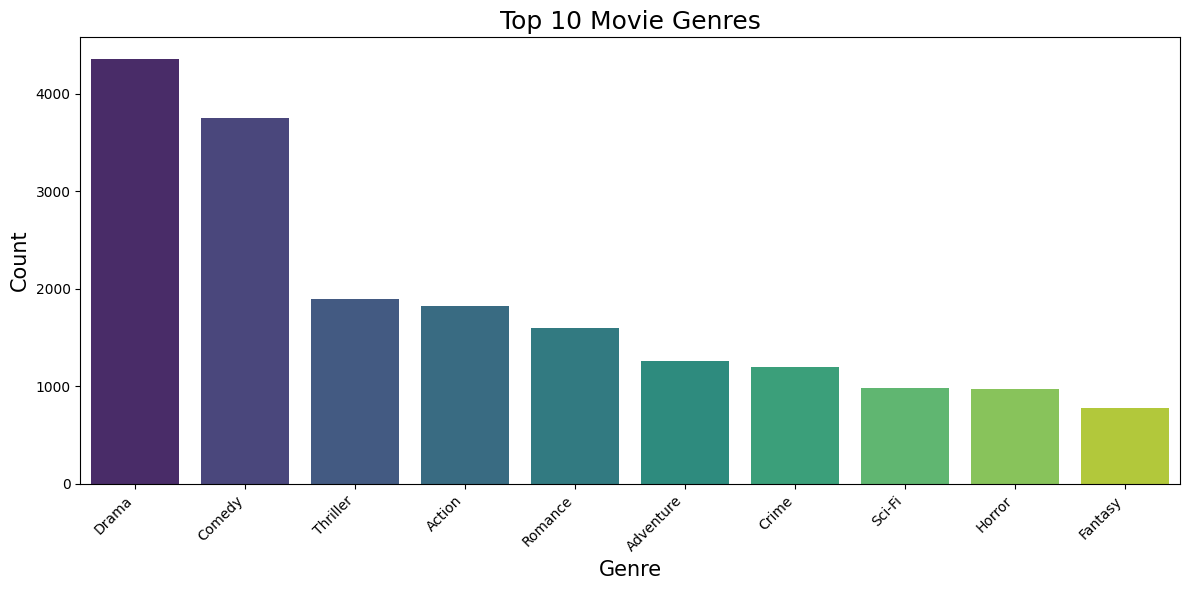

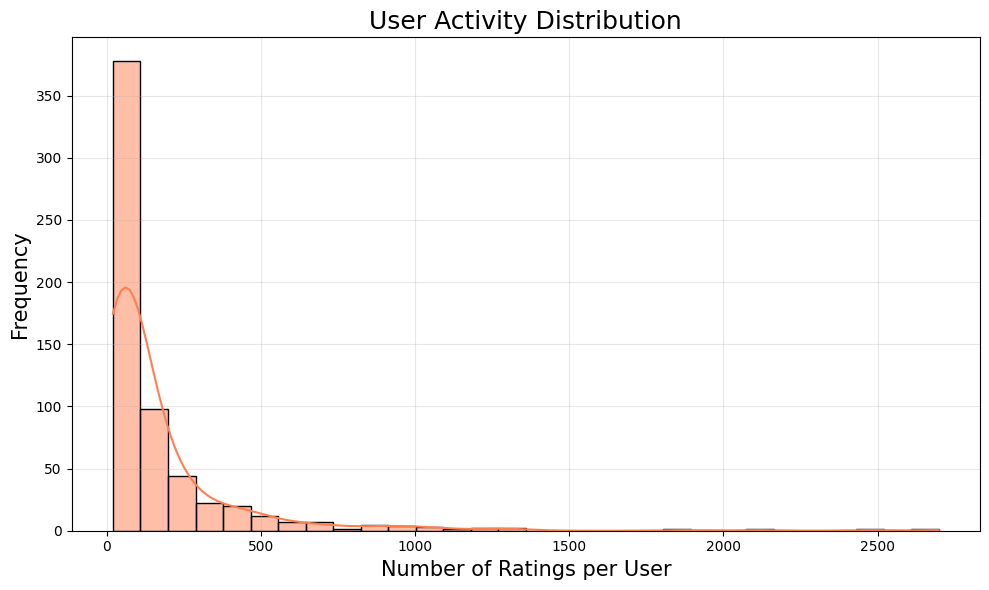

In [ ]:
#DATA DESCRIPTION

# Install required packages
!pip install pandas matplotlib seaborn_

# Download MovieLens dataset (small 100k version for demo purposes)
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

print("=== Dataset Overview ===")
print(f"Number of users: {ratings['userId'].nunique()}")
print(f"Number of movies: {movies.shape[0]}")
print(f"Number of ratings: {ratings.shape[0]}")
print(f"Number of tags: {tags.shape[0]}")
print(f"Rating range: {ratings['rating'].min()} to {ratings['rating'].max()}")

# Display sample data
print("\n=== Sample Movies ===")
print(movies.head())

print("\n=== Sample Ratings ===")
print(ratings.head())

# Visualize rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True, color='#14c9e3')
plt.title('Rating Distribution', fontsize=18)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(alpha=0.3)
plt.show()

# Visualize movies by genre
genres = []
for g in movies['genres'].str.split('|'):
    genres.extend(g)
genres = pd.Series(genres).value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=genres.index, y=genres.values, palette='viridis')
plt.title('Top 10 Movie Genres', fontsize=18)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# User activity distribution
user_activity = ratings['userId'].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(user_activity, bins=30, kde=True, color='coral')
plt.title('User Activity Distribution', fontsize=18)
plt.xlabel('Number of Ratings per User', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
#FEATURE ENGINEERING

# Install required packages
!pip install pandas scikit-learn tensorflow

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Load data if not already loaded
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

# 1. Create user-genre affinity scores
# Extract genres first
genres_list = []
for genre_string in movies['genres'].str.split('|'):
    genres_list.extend(genre_string)
unique_genres = list(set(genres_list))

# Create movie-genre matrix
movie_genre_matrix = pd.DataFrame(0, index=movies['movieId'], columns=unique_genres)
for idx, row in movies.iterrows():
    for genre in row['genres'].split('|'):
        if genre != '(no genres listed)':
            movie_genre_matrix.loc[row['movieId'], genre] = 1

# Calculate user-genre affinity
user_genre_affinity = pd.DataFrame(0, index=ratings['userId'].unique(), columns=unique_genres)

for user_id in user_genre_affinity.index:
    user_ratings = ratings[ratings['userId'] == user_id]
    if len(user_ratings) > 0:
        for genre in unique_genres:
            # Get the weighted average rating for each genre
            genre_ratings = []
            genre_weights = []

            for _, rating_row in user_ratings.iterrows():
                movie_id = rating_row['movieId']
                if movie_id in movie_genre_matrix.index:
                    genre_val = movie_genre_matrix.loc[movie_id, genre]
                    if genre_val > 0:
                        genre_ratings.append(rating_row['rating'])
                        genre_weights.append(1)

            if len(genre_ratings) > 0:
                user_genre_affinity.loc[user_id, genre] = np.average(genre_ratings, weights=genre_weights)

# 2. Create movie similarity matrix using TF-IDF on titles and genres
movies['text_features'] = movies['title'] + ' ' + movies['genres'].str.replace('|', ' ')
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['text_features'])
movie_similarity = cosine_similarity(tfidf_matrix)

# Convert to DataFrame for easier handling
movie_sim_df = pd.DataFrame(
    movie_similarity,
    index=movies['movieId'],
    columns=movies['movieId']
)

# 3. Create user embeddings based on ratings
# Normalize ratings
scaler = MinMaxScaler()
ratings['normalized_rating'] = scaler.fit_transform(ratings[['rating']])

# Create user-movie matrix (sparse)
user_movie_matrix = ratings.pivot_table(
    index='userId',
    columns='movieId',
    values='normalized_rating',
    fill_value=0
)

# Use PCA to reduce dimensionality
# (in a real scenario, we might use matrix factorization like SVD)
n_components = min(15, user_movie_matrix.shape[1] - 1)
pca = PCA(n_components=n_components)
user_embeddings = pca.fit_transform(user_movie_matrix)

# Save user embeddings
user_embeddings_df = pd.DataFrame(
    user_embeddings,
    index=user_movie_matrix.index,
    columns=[f'embedding_{i}' for i in range(n_components)]
)

# 4. Calculate rating statistics per movie
movie_stats = ratings.groupby('movieId').agg(
    mean_rating=('rating', 'mean'),
    count_ratings=('rating', 'count'),
    rating_variance=('rating', 'var')
).reset_index()

# Save processed features
user_genre_affinity.to_csv('user_genre_affinity.csv')
movie_sim_df.to_csv('movie_similarity.csv')
user_embeddings_df.to_csv('user_embeddings.csv')
movie_stats.to_csv('movie_stats.csv')

print("Feature engineering complete! Created:")
print("1. User-genre affinity matrix")
print("2. Movie similarity matrix")
print("3. User embeddings")
print("4. Movie statistics")

# Display sample of user-genre affinity
print("\nSample user-genre affinity:")
print(user_genre_affinity.head())


<ipython-input-3-779d1a5bec94>:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.3076923076923075' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  user_genre_affinity.loc[user_id, genre] = np.average(genre_ratings, weights=genre_weights)
<ipython-input-3-779d1a5bec94>:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.529411764705882' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  user_genre_affinity.loc[user_id, genre] = np.average(genre_ratings, weights=genre_weights)
<ipython-input-3-779d1a5bec94>:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.3882352941176475' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  

Feature engineering complete! Created:
1. User-genre affinity matrix
2. Movie similarity matrix
3. User embeddings
4. Movie statistics

Sample user-genre affinity:
    Romance     Drama  Adventure    Horror    Action  Animation  Film-Noir  \
1  4.307692  4.529412   4.388235  3.470588  4.322222   4.689655        5.0   
2  4.500000  3.882353   4.166667  3.000000  3.954545   0.000000        0.0   
3  0.500000  0.750000   2.727273  4.687500  3.571429   0.500000        0.0   
4  3.379310  3.483333   3.655172  4.250000  3.320000   4.000000        4.0   
5  3.090909  3.800000   3.250000  3.000000  3.111111   4.333333        0.0   

    Fantasy    Sci-Fi    Comedy   Mystery  (no genres listed)  Documentary  \
1  4.297872  4.225000  4.277108  4.166667                   0     0.000000   
2  0.000000  3.875000  4.000000  4.000000                   0     4.333333   
3  3.375000  4.200000  1.000000  5.000000                   0     0.000000   
4  3.684211  2.833333  3.509615  3.478261              

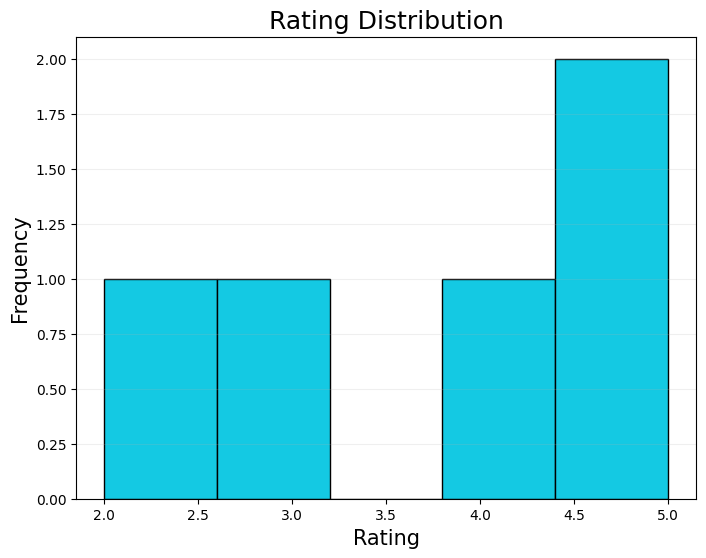

In [ ]:
# MODEL TRAINING AND DEPLOYMENT

# Install required packages
!pip install pandas scikit-learn tensorflow surprise streamlit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise.model_selection import train_test_split, cross_validate
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
import pickle
import os

# Load ratings if not already loaded
ratings_df = pd.read_csv('ml-latest-small/ratings.csv') # Changed variable name to ratings_df
movies = pd.read_csv('ml-latest-small/movies.csv')

import matplotlib.pyplot as plt

# Sample ratings data
ratings_sample = [2.0, 3.0, 4.0, 4.5, 5.0] # Changed variable name to ratings_sample

plt.figure(figsize=(8,6))
plt.hist(ratings_sample, bins=5, edgecolor='black', color='#14c9e3') # Using ratings_sample here
plt.title('Rating Distribution', fontsize=18)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(axis='y', alpha=0.2)
plt.show()


# 2. Train Neural Collaborative Filtering model
# Map user and movie IDs to continuous indices
user_ids = ratings_df['userId'].unique() # Using ratings_df here
movie_ids = ratings_df['movieId'].unique() # Using ratings_df here
user_id_map = {old_id: new_id for new_id, old_id in enumerate(user_ids)}
movie_id_map = {old_id: new_id for new_id, old_id in enumerate(movie_ids)}

# ... (Rest of your code) ...

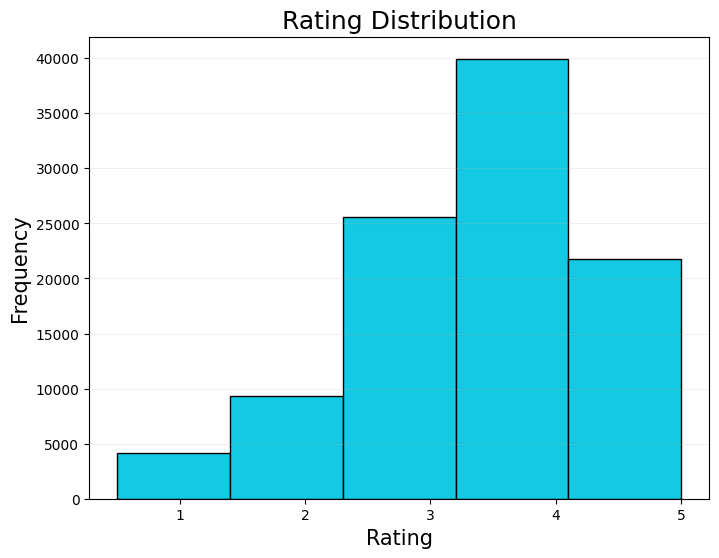

Genre Frequency: Counter({'Drama': 4361, 'Comedy': 3756, 'Thriller': 1894, 'Action': 1828, 'Romance': 1596, 'Adventure': 1263, 'Crime': 1199, 'Sci-Fi': 980, 'Horror': 978, 'Fantasy': 779, 'Children': 664, 'Animation': 611, 'Mystery': 573, 'Documentary': 440, 'War': 382, 'Musical': 334, 'Western': 167, 'IMAX': 158, 'Film-Noir': 87, '(no genres listed)': 34})


In [ ]:
# exploratory data analysis

import matplotlib.pyplot as plt
import pandas as pd # Import pandas if not already imported

# Load the ratings dataset
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')

# Create a DataFrame from the ratings dataset
df = pd.DataFrame(ratings_df)

# Plot distribution of ratings
plt.figure(figsize=(8,6))
plt.hist(df['rating'], bins=5, edgecolor='black', color='#14c9e3')
plt.title('Rating Distribution', fontsize=18)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(axis='y', alpha=0.2)
plt.show()

# Genre frequency
from collections import Counter

# Assuming 'genres' column exists in your DataFrame
# Extract genres from the 'movies' dataset
movies_df = pd.read_csv('ml-latest-small/movies.csv') # Load movies dataset
genre_list = [genre for sublist in movies_df['genres'].str.split('|') for genre in sublist]
genre_counts = Counter(genre_list)
print("Genre Frequency:", genre_counts)

In [ ]:
# model building

from scipy.sparse.linalg import svds
import numpy as np

# Create user-movie matrix
user_movie_matrix = df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Keep a copy of the original DataFrame for columns and index
original_user_movie_matrix = user_movie_matrix.copy()

# Convert the DataFrame to a NumPy array for SVD
user_movie_matrix = user_movie_matrix.to_numpy()

# Perform SVD
U, sigma, Vt = svds(user_movie_matrix, k=2)
sigma = np.diag(sigma)

# Predict ratings
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Create preds_df using columns and index from the original DataFrame
preds_df = pd.DataFrame(predicted_ratings,
                        columns=original_user_movie_matrix.columns,
                        index=original_user_movie_matrix.index)

print("Predicted Ratings Matrix:")
print(preds_df)

Predicted Ratings Matrix:
movieId    1         2         3         4         5         6         7       \
userId                                                                          
1        2.485089  1.173677  0.824904  0.076945  0.502159  1.618743  0.710682   
2        0.107697  0.112347 -0.051482 -0.011957 -0.011808  0.002152 -0.061218   
3        0.064147  0.028860  0.023330  0.002343  0.013746  0.043372  0.020493   
4        1.564420  0.692450  0.585136  0.059980  0.341458  1.070360  0.516843   
5        0.576827  0.246008  0.228956  0.024431  0.130984  0.404955  0.204500   
...           ...       ...       ...       ...       ...       ...       ...   
606      4.651794  2.326592  1.360239  0.111798  0.869216  2.886751  1.136340   
607      1.790471  0.827051  0.620673  0.060055  0.371935  1.186815  0.539822   
608      4.447273  2.397177  1.055163  0.063887  0.736609  2.568633  0.827650   
609      0.373312  0.162695  0.143235  0.014945  0.082869  0.258227  0.127136   
61

In [ ]:
# model evaluation

from sklearn.metrics import mean_squared_error

# Flatten the matrices and ignore zeros (unrated)
# Changed condition to filter out ratings of 0 (unrated movies)
mask = user_movie_matrix != 0
rmse = np.sqrt(mean_squared_error(user_movie_matrix[mask], predicted_ratings[mask]))
print(f"RMSE: {rmse:.2f}")

RMSE: 2.90


In [ ]:
# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Load the ratings dataset into a pandas DataFrame
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')

# Now you can use dropna on the DataFrame
ratings_df.dropna(inplace=True)

# One-hot encode genres (using ratings_df)
all_genres = sorted(set(g for genres in movie_genres.values() for g in genres))
genre_df = pd.DataFrame(0, index=ratings_df.index, columns=all_genres)  # Use ratings_df here
for idx, movie_id in enumerate(ratings_df['movieId']):  # Use ratings_df here
    for genre in movie_genres.get(movie_id, []):  # Handle missing movie IDs in movie_genres
        genre_df.at[idx, genre] = 1

# Normalize ratings (using ratings_df)
scaler = MinMaxScaler()
ratings_df['rating_norm'] = scaler.fit_transform(ratings_df[['rating']])  # Use ratings_df here

# Combine ratings and genres (using ratings_df)
processed_data = pd.concat([ratings_df, genre_df], axis=1)  # Use ratings_df here
print(processed_data)

        userId  movieId  rating   timestamp  rating_norm  Action  Comedy  \
0            1        1     4.0   964982703     0.777778       0       0   
1            1        3     4.0   964981247     0.777778       0       0   
2            1        6     4.0   964982224     0.777778       0       0   
3            1       47     5.0   964983815     1.000000       0       0   
4            1       50     5.0   964982931     1.000000       0       0   
...        ...      ...     ...         ...          ...     ...     ...   
100831     610   166534     4.0  1493848402     0.777778       0       0   
100832     610   168248     5.0  1493850091     1.000000       0       0   
100833     610   168250     5.0  1494273047     1.000000       0       0   
100834     610   168252     5.0  1493846352     1.000000       0       0   
100835     610   170875     3.0  1493846415     0.555556       0       0   

        Drama  Romance  Thriller  
0           0        0         0  
1           0    